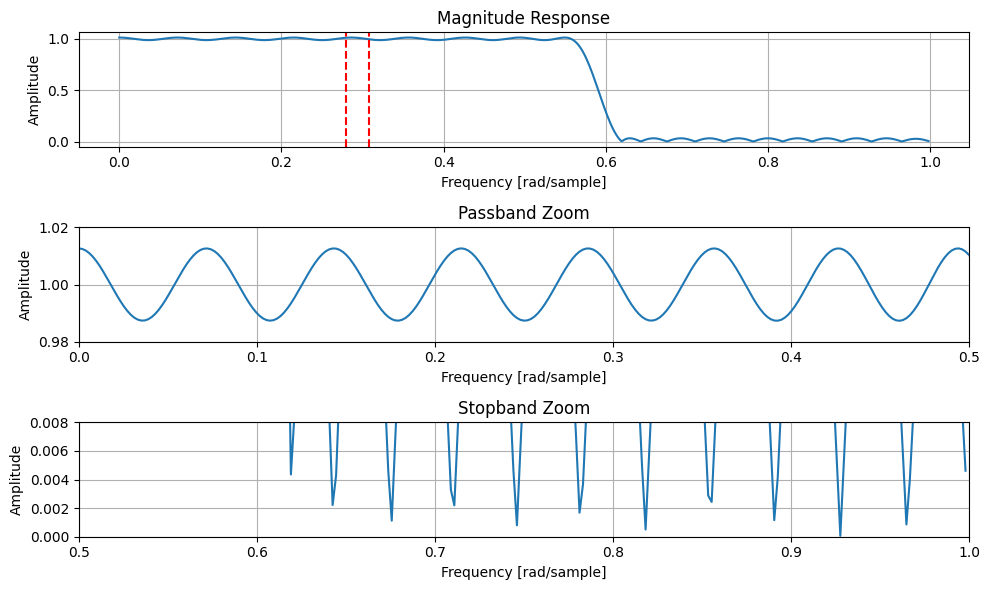

In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# 滤波器的参数
n = 55  # 滤波器阶数
f1 = 0.3  # 归一化截止频率
dp = 0.02  # 通带纹波
ds = 0.008  # 阻带纹波

# fircls1 在 scipy 中没有直接的等价，但可以使用 remez 来近似
# fircls1 使用的是 fircls，设置不等的权重来控制通带和阻带波动
# 计算通带和阻带的权重
weights = [dp, ds]

# 使用remez设计滤波器
# 注意：remez函数的bands参数定义了通带和阻带的边界，我们把截止频率分为两部分来指定它们
# 这里的频带设置需要根据实际情况可能需要进一步调整以匹配MATLAB的结果
# 还需要考虑MATLAB和Python的频率归一化方式可能不同，这可能导致设计的差异
b = signal.remez(n+1, [0, f1-dp, f1+ds, 0.5], [1, 0], weight=weights)

# 计算频率响应
w, h = signal.freqz(b)

# 绘制频率响应
plt.figure(figsize=(10, 6))

# 绘制总体频率响应，并添加设计的边界
plt.subplot(3, 1, 1)
plt.plot(w/np.pi, np.abs(h))
for edge in [f1-dp, f1+ds]:
    plt.axvline(edge, color='red', linestyle='--')
plt.title('Magnitude Response')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Amplitude')
plt.grid()

# 通带放大视图
plt.subplot(3, 1, 2)
plt.plot(w/np.pi, np.abs(h))
plt.axis([0, 0.5, 1-dp, 1+dp])
plt.title('Passband Zoom')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Amplitude')
plt.grid()

# 阻带放大视图
plt.subplot(3, 1, 3)
plt.plot(w/np.pi, np.abs(h))
plt.axis([0.5, 1, 0, ds])
plt.title('Stopband Zoom')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()
